# lab01

In [381]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math

In [382]:
class ErrMethod:

    h_arr = np.array([2/2**n for n in range(1,21)])

    def __init__(self, method_name: str, method_func):
        self.mthd_name = method_name # название используемого численного метода 
        self.mthd_func = method_func # численный метод

    '''
    Заметим, что в аргумент данного метода передается именно эскиз функции;
    НЕ реальная функция.
    '''
    def GetErr(self, point, h, function_sketch: sp.core.power.Pow):
        x = sp.Symbol('x')

        #---------------------------------------------------
        '''Сделаем реальную функцию, по заданному эскизу'''
        func = sp.lambdify(x, function_sketch)
        diff_func = sp.lambdify(x, sp.diff(function_sketch))
        #---------------------------------------------------

        return abs(diff_func(point) - self.mthd_func(func, point, h))

    '''
    Заметим, что в аргумент данного метода передается именно эскиз функции;
    НЕ реальная функция.
    '''
    def PlotErr(self, point, function_sketch: sp.core.power.Pow):
        err = np.array([])
        for h in self.h_arr:
            err = np.append(err, self.GetErr(point, h, function_sketch))

        return plt.loglog(self.h_arr, err, marker='s', alpha=0.75, lw=1.5, ls='-', label=self.mthd_name)

In [383]:
class GraphErr:

    def __init__(self, function: tuple, err_method_map: np.ndarray):
        self.function_name = function[0] # название аналитической функции
        self.function = function[1]      # аналитическая функция
        self.mthd_map = err_method_map   # набор численных методов

    def Plot(self, point):
        for meth in self.mthd_map:
            meth.PlotErr(point, self.function)

        plt.minorticks_on()
        plt.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
        plt.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

        plt.legend()
        plt.title(self.function_name + r'   $(x_0 = %0.2f)$' %point)
        plt.xlabel('h')
        plt.ylabel(r'$\Delta f$')

    def BestMeth(self):
        pass

In [384]:
'''
Заметим, что элементы в данном словаре не являются реальными функцими,
то есть нельзя вызвать их с заданным аргументом и получить результат.
Данные функции являются эскизами реальных функций.

Больше информации см python sympy manual.
'''

x = sp.Symbol('x')
func_sketch_map = {"sin(x^2)"         : sp.sin(x ** 2), 
                   "cos(sin(x))"      : sp.cos(sp.sin(x)), 
                   "exp(sin(cos(x)))" : sp.exp(sp.sin(sp.cos(x))), 
                   "ln(x + 3)"        : sp.log(x + 3),
                   "(x + 3)^(0,5)"    : (x + 3) ** (1/2)}

In [385]:
def meth1(f, x, h):
    return (f(x + h) - f(x)) / h

def meth2(f, x, h):
    return (f(x) - f(x - h)) / h

def meth3(f, x, h):
    return (f(x + h) - f(x - h)) / (2*h)

def meth4(f, x, h):
    return (4/3) * (f(x + h) - f(x - h)) / (2*h) - (1/3) * (f(x + 2*h) - f(x - 2*h)) / (4*h)

def meth5(f, x, h):
    return (3/2) * (f(x + h) - f(x - h)) / (2*h) - (3/5) * (f(x + 2*h) - f(x - 2*h)) / (4*h) + (1/10) * (f(x + 3*h) - f(x - 3*h)) / (6*h)

mthd_map = np.array([
    ErrMethod('meth1', meth1), 
    ErrMethod('meth2', meth2), 
    ErrMethod('meth3', meth3),
    ErrMethod('meth4', meth4),
    ErrMethod('meth5', meth5)
])

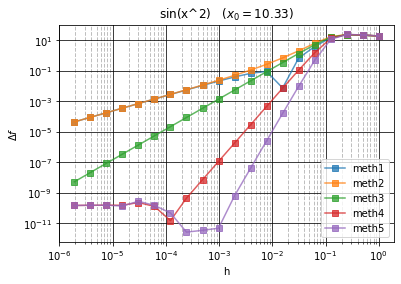

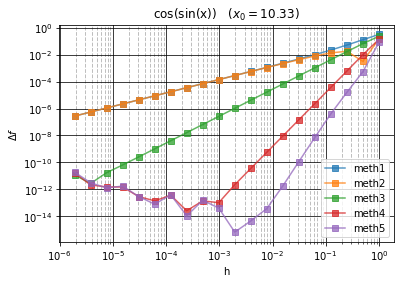

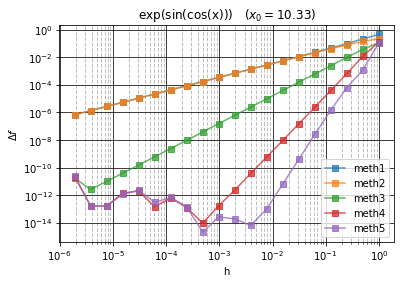

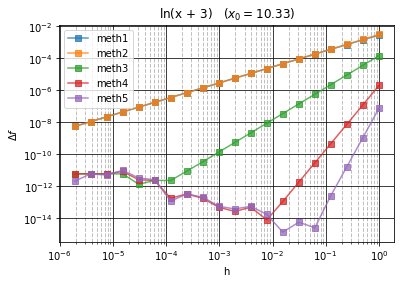

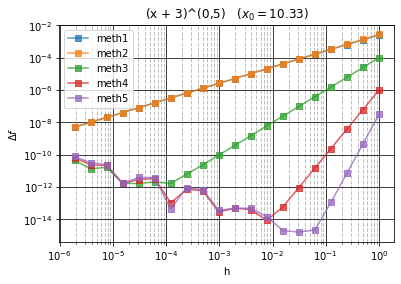

In [386]:
x0 = 10.33

for key in func_sketch_map.keys():
    figure, _ = plt.subplots()
    graph_obj = GraphErr((key, func_sketch_map[key]), mthd_map)
    graph_obj.Plot(x0)
    figure.savefig("images/" + str(key) + ".pdf")

In [387]:

#TODO: добавить теорию Markdown + Latex
#TODO: перевести комментарии на английский
#TODO: добавить описание классов
#TODO: добавить конструкцию try except в местах, где вызываются математические функции
#TODO: вероятно придется написать свой класс исключений для проверки валидности произвольной математической функции